<h1 align=center> Proceso de ETL </h1><p align=center>(ETL PROCESS)</p>

<h3 align=left> Instalacion de librerias<sub>/Library installation</sub> </h3>

In [4]:
pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 76.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.1/117.1 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 814.2/814.2 kB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 79.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 72.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━

<h3 align=left> Importacion de librerias<sub>/Library Importing</sub> </h3>

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ast
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import json

<h2 align=Center> Extraccion de datos<sub>/Data extraction</sub></h2>

<h3 align=left> Rutas /<sub> Paths</sub> </h3>

In [6]:
# Ubicaciones de los archivos Json\\ Json files paths
raw_reviews = 'australian_user_reviews.json'
raw_items = 'australian_users_items.json'
raw_games = 'output_steam_games.json'

<h3 align=left> Funciones<sub>/Functions</sub></h3>

In [19]:
def Open_extraction(raw_data):
  """
  Esta función lee linea a linea  la data del archivo JSON y entrega una lista de diccionarios.
  This function reads each line of the JSON data from a file and converts it into a list of dictionaries.
  """
  new_list = []
  with open(raw_data, 'r', encoding='utf-8') as json_file:
      for line in json_file:
          new_dicc = ast.literal_eval(line) # ast.literal_eval convierte la línea en un diccionario / ast.literal_eval converts the line to a dictionary
          new_list.append(new_dicc)
  return new_list

In [20]:
def Open_extraction_games(raw_data):
  """
  Esta función lee el archivo JSON y entrega una lista de diccionarios.
  This function reads JSON data from a file and converts it into a list of dictionaries.
  """
  with open(raw_data, 'r', encoding='utf-8') as Json_file:
          new_list = [json.loads(line) for line in Json_file]
  return new_list

In [9]:
def analyzer(review):
  """
  Esta función analiza el sentimiento de una reseña de texto (review) y devuelve un valor que representa la polaridad del sentimiento
  This function analyze and assigns a score based on the sentiment analysis of the review
  """
  if isinstance(review, str):
      score = SentimentIntensityAnalyzer().polarity_scores(review)
      if score['compound'] < -0.05:
          return 0
      elif score['compound'] > 0.05:
          return 2
      else:
          return 1

In [22]:
def Unnesting_data(raw_df,data_column):
    """
    Esta función transforma una columna con datos anidados en un conjunto de columnas independientes y las une en un solo Dataframe
    This function transforms a column with nested data into a set of independent columns and joins them into a single Dataframe.
    """
    data_columns = raw_df.explode([data_column])
    unnested_data1 =pd.json_normalize(data_columns[data_column]).set_index(data_columns[data_column].index)
    processed_data = pd.concat([data_columns, unnested_data1], axis=1).reset_index().drop(['index',data_column], axis = 1)
    return processed_data


In [ ]:
Items_nested_data = pd.DataFrame(Open_extraction(raw_items))
Items_nested_data

In [ ]:
reviews_nested_data = pd.DataFrame(Open_extraction(raw_reviews))
reviews_nested_data

In [ ]:
preprocess_games_data = pd.DataFrame(Open_extraction_games(raw_games))
preprocess_games_data

<h2 align=Center> Transformacion de datos<sub>/Data transform</sub></h2>

Desanidado de columnas

Items

In [12]:
Items_unnested_data = Unnesting_data(Items_nested_data,'items')
preprocess_items = Items_unnested_data

reviews

In [29]:
reviews_unnested_data = Unnesting_data(reviews_nested_data,'reviews')
preprocess_reviews = reviews_unnested_data

Manejo de datos nulos

In [ ]:
preprocess_items = Items_unnested_data.isnull().any()
preprocess_items

In [ ]:
preprocess_reviews = reviews_unnested_data.isnull().any()
preprocess_reviews

In [ ]:
preprocess_games_data.isnull().any()

Datos nulos por tabla

In [ ]:
(
    preprocess_games_data
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=2
            )
        )
    )
)

In [ ]:
(
    preprocess_games_data
    .isnull()
    .transpose()
    .pipe(
        lambda df: sns.heatmap(data=df)
    )
)

In [ ]:
Fullnan_drop_games = pd.concat([preprocess_games_data.iloc[0:88310].dropna(), preprocess_games_data.iloc[88311:]], axis=0).reset_index().drop('index', axis = 1)
Fullnan_drop_games

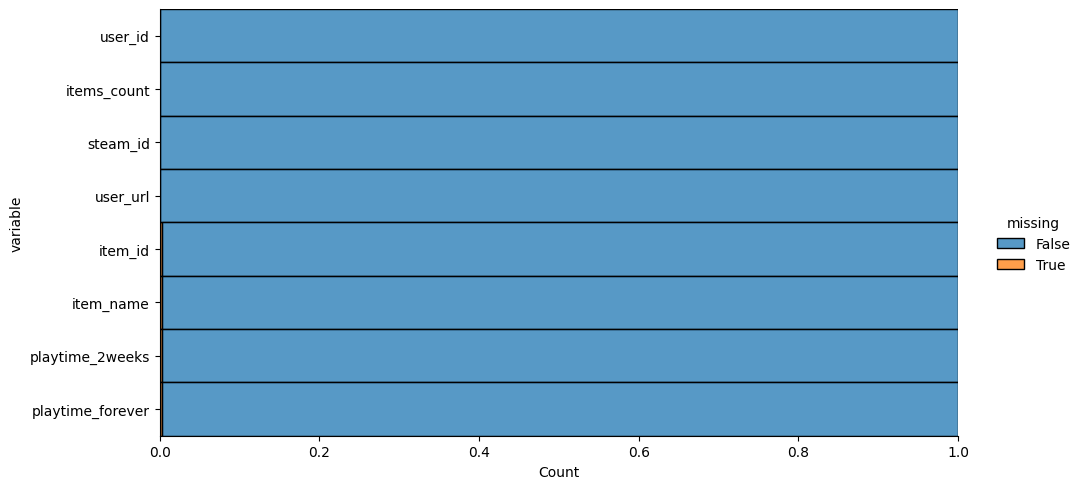

In [ ]:
(
    preprocess_items
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=2
            )
        )
    )
)

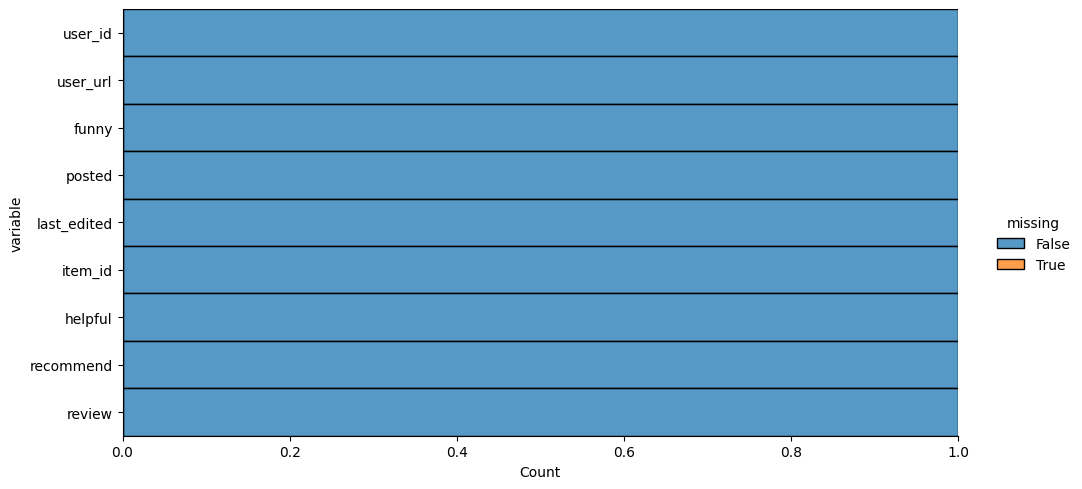

In [ ]:
(
    preprocess_reviews
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=2
            )
        )
    )
)

Preparacion de columnas

In [ ]:
preprocess_reviews ['Year'] = preprocess_reviews['posted'].str.extract('(\d{4})', expand=False)
preprocess_reviews

In [ ]:
preprocess_reviews['recommend'] = preprocess_reviews['recommend'].replace({True: 1, False: 0})
preprocess_reviews

<h3 align=left> Analisis de sentimientos<sub>/Sentiment analyzer</sub></h3>

In [ ]:
nltk.download('punkt')
nltk.download('vader_lexicon')

In [ ]:
preprocess_reviews['sentiment_analysis'] = preprocess_reviews['review'].apply(analyzer)
preprocess_reviews

Elimminacion de nulos

In [41]:
preprocess_reviews = preprocess_reviews.dropna()
preprocess_items = preprocess_items.dropna()

In [ ]:
preprocess_reviews

Eliminacion de columnas no necesarias para el analisis

In [43]:
processed_reviews = preprocess_reviews.drop(['user_url','last_edited','funny','helpful','posted','review'], axis = 1)

In [46]:
processed_items = preprocess_items.drop(['items_count','user_url','item_name','steam_id','playtime_2weeks'], axis = 1)

In [47]:
preprocess_items

,user_id,item_id,playtime_forever
0,76561197970982479,10,6.0
1,76561197970982479,20,0.0
2,76561197970982479,30,7.0
3,76561197970982479,40,0.0
4,76561197970982479,50,0.0
...,...,...,...
5170009,76561198329548331,346330,0.0
5170010,76561198329548331,373330,0.0
5170011,76561198329548331,388490,3.0
5170012,76561198329548331,521570,4.0


<h2 align=Center> Carga de datos<sub>/Data load</sub></h2>

<h4>Convercion de archivos Json a parquet</h4>

In [48]:
preprocess_items = preprocess_items.to_parquet('items')


In [49]:
preprocess_reviews = preprocess_reviews.to_parquet('reviews')
